**TASK:** TO PREDICT THE ADMISSIONS FOR GRADUATES

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

**import the dataset**

In [3]:
df = pd.read_csv('Admission_Predict.csv')

**overview of data**

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.shape

(400, 9)

**data is continous in y label ,so there is a need to convert values in finite form because we need to perform classification techniques for testing on data. <br>For this, new column is added in dataset named "CHANCE "in which 2 classes are made (0,1)
<br>
in which <br>
if value > mean  it belongs to class1
else to class 0**

In [21]:
chance=[]
for i in df['Chance of Admit ']:
    if i>0.72:
        chance.append(1)
    else:
        chance.append(0)
df['CHANCE'] = chance


In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CHANCE
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [52]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'CHANCE'],
      dtype='object')

In [24]:
df.shape

(400, 10)

**EDA**

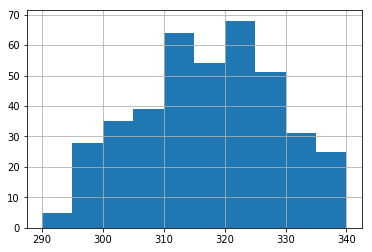

In [25]:
df['GRE Score'].hist()

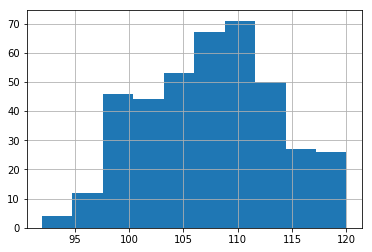

In [26]:
df['TOEFL Score'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002484E3FDE10>,
      dtype=object)

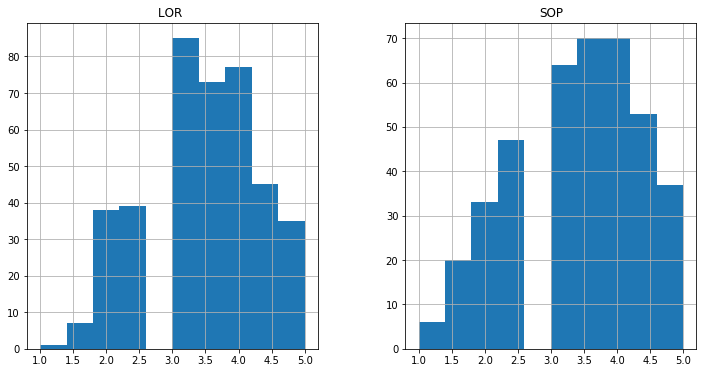

In [27]:
df[['SOP','LOR ']].hist(figsize=(12,6))

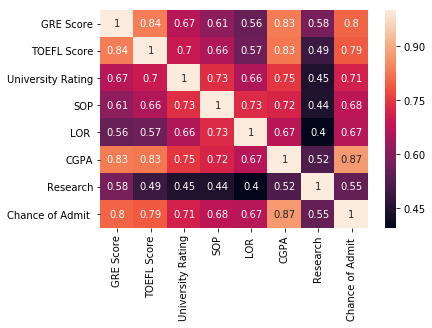

In [90]:
num_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

cor_mat = df[num_features].corr()

sns.heatmap(cor_mat,annot =True)

GRE Score,TOEFL Score,CGPA are the three features which strongly depends upon chance of admit<br>
 chance of admit is least affected by research field

C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


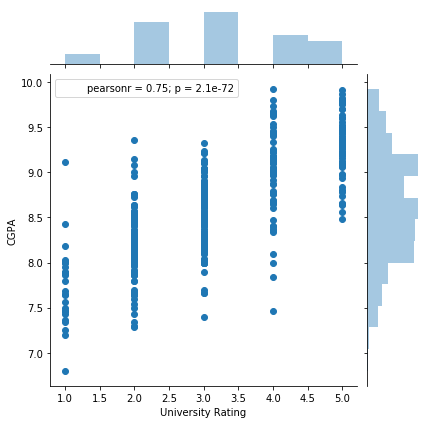

In [60]:
sns.jointplot(x='University Rating',y='CGPA',data=df)

as university rating increases CGPA score also increases

C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


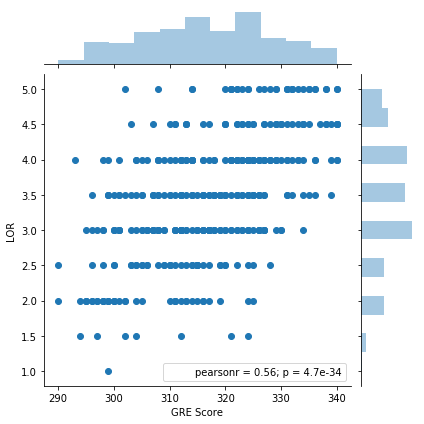

In [64]:
sns.jointplot(x='GRE Score',y='LOR ',data=df)

High GRE Score candidates have high score for LOR

C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


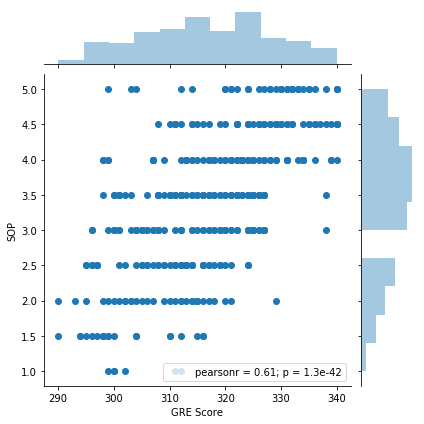

In [65]:
sns.jointplot(x='GRE Score',y='SOP',data=df)

candidates with high GRE Score have higher SOP score

C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


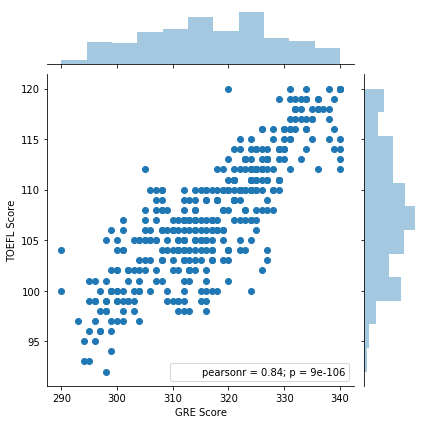

In [66]:
sns.jointplot(x='GRE Score',y='TOEFL Score',data=df)

candidates having high GRE Score have high score in TOEFL and vice-versa

C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


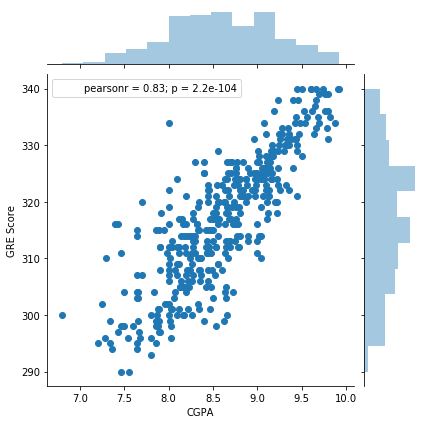

In [73]:
sns.jointplot(x='CGPA',y='GRE Score',data=df)

candidates with high CGPA have high GRE score

**candidates with higher University rating,CGPA,GRE Score,TOEFL Score have higher chance sof getting admission.**

In [77]:
df.isnull().values.any()

False

## no missing value##


In [30]:
df = df.drop(columns = {'Serial No.'})

In [34]:
y = df['CHANCE']
y

0      1
1      1
2      0
3      1
4      0
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
370    0
371    1
372    1
373    1
374    0
375    0
376    0
377    0
378    0
379    0
380    1
381    1
382    1
383    0
384    1
385    1
386    0
387    0
388    0
389    1
390    0
391    0
392    1
393    1
394    1
395    1
396    1
397    1
398    0
399    1
Name: CHANCE, Length: 400, dtype: int64

In [78]:
x=df.drop(columns={'Chance of Admit ','CHANCE'})
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


**preparing for machine learning**

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**LOGISTIC REGRESSION**

In [81]:
#LOGISTIC REGRESSION
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_pred = clf.predict(X_test)

In [83]:
confusion_matrix(Y_test,y_pred)

array([[42,  8],
       [ 6, 44]], dtype=int64)

In [84]:
accuracy_score(Y_test,y_pred)

0.86

**GAUSSIAN NB**

In [85]:
# GAUSSIAN NB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_p = gnb.predict(X_test)
a = accuracy_score(Y_test,y_p)
print(a)
c = confusion_matrix(Y_test,y_p)
print(c)

0.86
[[41  9]
 [ 5 45]]


**svm**

In [86]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
y_pp = model.predict(X_test)

In [88]:
accuracy_score(Y_test,y_pp)

0.87

**DECISION TREES**

In [89]:
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train, Y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = accuracy_score(Y_test,y_predict)
dec_tree_score

0.75

**RESULTS**<BR>
LOGISTIC REGRESSION: 0.86<BR>
LINEAR SVM :0.87<BR>
DECISION TREES: 0.75